In [1]:
import json
import seaborn as sns
import os
import transformers
from tqdm.notebook import tqdm
import numpy as np
tokenizer = transformers.AutoTokenizer.from_pretrained("EleutherAI/gpt-j-6B", cache_dir="mycache")
MAX_INPUT_TOKENS = 2048
MAX_INPUT_WORDS = 1500

Downloading:   0%|          | 0.00/619 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/779k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.94k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/357 [00:00<?, ?B/s]

In [3]:
files = [os.path.join('data', el) for el in os.listdir('data')]

descriptions = []
actions = []
actions_texts = []
descriptions_texts = []

for el in tqdm(files):
    j = json.load(open(el))
    for key, state in j.items():
        curr_actions = state['query_texts']
        text = state['main_text']
        descriptions.append(len(tokenizer.encode(text)))
        descriptions_texts.append((text, len(tokenizer.encode(text)), el))
        for action in curr_actions:
            actions.append(len(tokenizer.encode(action)))
            actions_texts.append((action, len(tokenizer.encode(action)), el))

  0%|          | 0/870 [00:00<?, ?it/s]

### Tricky actions:
- I will cast a minor spell which allows the air to carry the sound to my ear. [You can do that even without being specialized in Air.]
- "Let’s arrange a marriage of our children. How about one of your kids gets to marry one of mine?" (unofficial, informal, and politically inconsequential understanding usually ignored outside of the enjoined kingdoms)
- "Let’s swear to a military alliance between us two." (peace agreement + provide troops and other military aid to the other as needed, an internationally recognized edict which tends to increase war and violent conflict)
- Fire your ballistae at and destroy Minâ€™s own ballistae installations; once his ballistae are eliminated, advance your cloud ladders, carrying a mix of infantry and archers, to storm the walls and capture the keep
- NOOOOOOOOO! I DIED! CURSE YOU SENTINELPENGUIN!!!
- Needles wonâ€™t puncture his skin, so he squirts it out his eye ducts
- The Epirus-Rome War (280-279BC) - MEDIUM DIFFICULTY
- 2: The Athens-Sparta War (432-418BC) - HARD DIFFICULTY
- Don’t care, you need to drink – get some of the water from under the pier
- “It’s OK, I’m just passing through,” you reply truthfully
- 4th British defenders
- Evidence: Attorneys Badge
- , Ko e fasi 'o e tu'i 'o e 'Otu Tonga
- Dossier: Double Trouble
- List of Noted Sailors of the Three Kingdoms
- MAIN MENU
- Synopsis mode. (Was there something you wanted to know? Click here!) *Spoiler Alert!*
- HARD: You are an eighteen year old, up-and-coming female model in India. A company called Pond's has asked you if you'd like to do a commerical with them. You are at their office, waiting to discuss the potential contract. data/are-you-happy-with-your-choices~3f.json
- (Intelligence) Rhode is a hypocrite. She might brag about her years in the arena, but she’s never surrendered to an honourable death. I point out as much, no matter what punishment it might get me. data/The-Price-of-Freedom~3a-Innocence-Lost.json
- "So, that's Pegasi Station - an impressive piece of technology," the captain said. "Lieutenant Gregari, other than humans, which species inhabit this station?" (Turn to Section - 54)
-  Zorek isn’t interested in the bureaucracy. He will go and find someone in charge
- If you think it's best to stay put and wait for Andrade's return, turn to page 115. data/Marooned-on-Giri-Minor.json
- Accept the King of Merrywed's marriage proposal in exchange for protection: go to section 8a if you sent soldiers with the messengers data/Survive-or-Conquer.json

In [4]:
banned = ["are-you-happy-with-your-choices~3f.json", "Warlords~3a-Strategic-Conquest.json", 
          "Survive-or-Conquer.json", "Maintenance-Systems.json", "Algebra-Game.json",
          "Tower-of-Doom.json", "Practice-Simple-Italian.json"]
phrase_ban = ["Synopsis", "MENU", "HARD", "EASY", "MEDIUM", "Turn to Section", "go to section", 
              "turn to page", "go to page", "					", "Start over", "END THE GAME", "Rating:",
             "Rank:"]

for text, l, src in actions_texts:
    is_banned = False
    for ban in banned:
        if ban in src:
            is_banned = True
    for phrase in phrase_ban:
        if phrase in text:
            is_banned = True
    if is_banned:
        continue
    if l < 20:
        continue
    print(l, len(text), text, src)

35 131 No thank you, I’m a perfect angelic little lamb of a child and I prefer to believe everything I’m told and never think for myself.  data/Facts-About-the-Planet-and-the-Solar-System.json
35 131 No thank you, I’m a perfect angelic little lamb of a child and I prefer to believe everything I’m told and never think for myself.  data/Facts-About-the-Planet-and-the-Solar-System.json
22 102 you leave the cell open and hope all the men ascaping will create a diversion so that you can get away data/Isabel's-Next-Adventure.json
22 91 I will use the time to study the landscape, as I have never been so far from Alzura before. data/Magus~3a-Betrayal.json
22 91 I will use the time to study the landscape, as I have never been so far from Alzura before. data/Magus~3a-Betrayal.json
22 91 I will use the time to study the landscape, as I have never been so far from Alzura before. data/Magus~3a-Betrayal.json
22 91 I will use the time to study the landscape, as I have never been so far from Alzura be

27 122 Demand Rothbard tell you how to lift the curse [You will be unable to choose any of the other options after you pick this] data/The-Swan-Lake.json
27 122 Demand Rothbard tell you how to lift the curse [You will be unable to choose any of the other options after you pick this] data/The-Swan-Lake.json
27 122 Demand Rothbard tell you how to lift the curse [You will be unable to choose any of the other options after you pick this] data/The-Swan-Lake.json
21 70 "I love you. But...you're right. This is your future. You have to go." data/Halfway-Decent.json
21 70 "I love you. But...you're right. This is your future. You have to go." data/Halfway-Decent.json
20 79 Wennipeg went to a group of people he didn't know, to try and make some friends data/Wennipeg's-list-of-regrets.json
20 79 Wennipeg went to a group of people he didn't know, to try and make some friends data/Wennipeg's-list-of-regrets.json
20 79 Wennipeg went to a group of people he didn't know, to try and make some friends da

### Tricky descriptions:
- 

In [5]:
banned = ["are-you-happy-with-your-choices~3f.json", "Warlords~3a-Strategic-Conquest.json", 
          "Survive-or-Conquer.json", "Maintenance-Systems.json", "Sixteen-Words.json", 
          "How-well-do-you-know-your-British~2dEnglish~3f.json", "Harry-Potter-and-the-Deathly-Hallows-Quiz.json",
         "Monster-Trivia.json", "Z~2dDAY-Survival-Quiz.json", "Battlefield-Commander~3a-Ancient-Warfare.json", 
         "Algebra-Game.json", "Tower-of-Doom.json", "Practice-Simple-Italian.json", "ENG4U1-Seminar-Game.json",
         "Eating-Disorders-Midterm.json"]
# todo ban any quiz
phrase_ban = ["Synopsis", "MENU", "HARD", "EASY", "MEDIUM", "Turn to Section", "go to section", 
              "turn to page", "go to page", "					", "Start over", "END THE GAME", "Rating:",
             "Rank:", "THE END", "The end", "The End", "Please play again", "YOUR HEALTH", 
              "Your score was", "Your score is"]
from time import sleep

for text, l, src in descriptions_texts:
    if "quiz" in src.lower():
        continue
    is_banned = False
    for ban in banned:
        if ban in src:
            is_banned = True
    has_phrase = False
    for phrase in phrase_ban:
        if phrase in text:
            has_phrase = True
    if is_banned:
        continue
    if has_phrase:
        continue
    if l < 400:
        continue
    print(l, len(text), text, src)
    sleep(1)

640 2654 
You decide to call the number and see about getting an interview. The phone rings only once before someone answersPhone:"This is John. Thank you for calling prohibitos autem scientiam. Are you interested in a job?"You are surprised by how fast this guy answered the phone.You:"Yes. I would like to apply."John:"WONDERFUL! Just come on by whenever you get the chance and we will run a physical to see if you are eligible to help us with our next discoveries. You can find us at 22 Arid Avenue in Chesterfield."You:"Thank you sir."You hear a click as the phone call abruptly ends. How rude. You decide to make your way down there. you arrive at 22 Arid Avenue to find a building that you never knew was there. You enter to see a woman typing away at the front desk.You:"Yes, I'm here to apply for the job."The woman points to a door beside her desk and continues typing.You:"Thank you ma'am."These people are rude.You find a long hallway with many doors and a tall man at the end. He walks up

483 1913 
“Atlas,” she told her son. “It’s time for me to go now.”He swam anxiously up to her. “Mother, but if you can just hold on, the next galaxy isn’t far at a--”“I’ve held on as long as I can. But my body is too weak. Atlas, you have been so faithful, but I must ask you one last favor.”“Anything, Mother.”“Don’t let the egg hatch out here, and don’t let it hatch alone. After I’m gone, please take my shell to a part of the Sea filled with warmth and life and stay with it until the hatchling is ready to emerge, and then to travel the Sea on its own. I can feel already it is so close to hatching...it just needs a few more million years.”With that, she breathed her last, and he wept as he took her up on his back and carried her onward toward the nearest galaxy.  ***When next Terra became aware, she was her soul, inside herself. All around she could feel the tugging of the Sea of Light, but as they swam through such a cold region of it, she resisted. The sight of her egg, as well, fille

439 1753 
“So, you said you would leave once your egg was ready to hatch and swim out into the galaxy on its own?” one of the lead Starflies asked, after whispering away with the others awhile.“That was the plan.”“But you’re not in any particular hurry to leave, are you? You’ve got two of your children right here, in a very nice location, and merging with the Sea...well, all souls eventually do it, but it isn’t exactly going anywhere.”“I suppose. But what are you getting at?”“Well, what if the egg also decides it’s in no hurry? We will just keep him comfortable and sleepy, so that it will be a little while longer before he wants to leave his shell. And maybe we can figure out a better solution in the meantime, or maybe we’ll turn out not to need it after all.”Terra spun along her usual arc following the curve of her shell, again and again as she mulled that over. “Hmm. I can’t pretend I have any better ideas. But only as long as my baby is content inside the shell. If he ever decides h

555 2373 
			Lucius is a tall, slender man. There is always the sly grin on his face, and his hair looks like he has been in a tornado.Right now, looking at J'Arel and you, his grin nearly splits his face, causing J'Arel to scowl back."Well, look who's here. Not suffocated yet, I hope", Lucius grins. J'Arel only snorts with disdain, throwing you a meaningful look as if the journey would have been quite pleasant without your companionship inside the coach.Before you can think of how to answer that challenge, Lucius continues as if not noticing the tension between the two of you: "Looks like we got ourselves some trouble coming. The captain of the scouts just raced his horse nearly to death coming here, then barely pauses to take a breath before arguing with old Farhan. Seems like they want us to make camp here, instead of driving on, but Farhan doesn't sound too happy about that."Lucius gives the countryside an appraising glance."Can't say I blame them. It's a good position here, with t

776 3420 
			You are not dead, and you are quite sure of it, because you always heared of death being somewhat of a peaceful slumber. Instead, your head feels like it is going to explode every second now, the world appears to be one of those carroussels you have visited once on a fair near the Academy, and if your stomach wasn't empty already, it would soon be.With a groan you open one of your eyes, only to find that the world not only spins like a carroussel, but the flashing lights that dance before your vision also appear to be like the fireworks that often accompany the fairs.You have no idea how long you were left there lieing, but when you open your eyes again, you stare into a horrific face, swollen and blurred like a nightmare come true.You gasp and wrench from the hands that suddenly grasp your shoulders, only to find that the sudden movement brings an explosion of pain so far unknown to you into your head, and you cannot help but twist to one side, assisted by the hands, and 

512 2415 
Welcome to Magus: Betrayal!You are known as Uriel, master elementalist and accomplished magician of the Acadamy of Alzur.The Spark, the talent to manipulate the essence of the elements in everything, has enabled you to live a youth far away from the spears of the soldiers, or the toils of the peasants.A findling you are, born to unknown parents and found on the steps of the Academy, but this is not a fate unusual, for the times are harsh for those without the privilige of noble heritage, and few can spare the resources to feed yet another crying mouth.If the Magi of the Academy had not found the Spark in you, they would have turned you over to one of the servants to grow up as one of them, a practice that comes closest to local charity, and ensures that the servants are loyal to the Academy.But this fate was spared to you.From earliest childhood you learned the arts of the scribe, the arts of the rune and the arts of the Elements.Your life has been one of scholarship, and lea

485 2213 
			You sit down on the ground and close your eyes, sending out a mental call to all the animals around you.You probe into their minds and send your image, a human friend in need of help, and already you hear their answers.Dominating the mental images that answer is that of a huge, black shadow, and you know it must be the most powerful animal around - a natural leader, as you will.You feel its presence approaching, and the remaining guards gasp aloud as suddenly a huge black wolf jumps into your mid without so much of a sound. Swords and axes are drawn, but you command them to drop their weapons.The wolf, with the natural grace of a killer, ignores them as lesser prey - you see them through his eyes - and approaches them.You are about to lay down on the ground and bare your throat, not as a gesture of fear but as a token of respect, when you sense that something is not quite right about this wolf. You hesitate, but the wolf does neither appear to notice nor to care.He sits do

449 1974 
			You are lead into the heart of the city, and something definitely feels wrong here. The atmosphere is tense unlike the teeming, bustling city you left only five days ago.The huge ironwrought gates of the Academy are opened for you, and your group enters. Without even given the chance to refresh yourself, much to your dismay, you are led before the council's chambers and bidden entry.The chambers themselves are somewhat in disarray, as if there had been a meeting recently and yet no time for the personell to clean, and three of the five High Magi look like indeed they have been roused from sleep. They stare at you, some with unhidden contempt, until finally Tharain Ironweave, highest of the Magi, steps forward and explains the situation to you.There had been an assassination attempt on the wedding night of princess Jessamin of Khalar, the very city your treck was initially heading. This was exactly two days before.And, apparently, evidences point towards Master Farhan Brown

511 2299 
			It takes you the better part of to two weeks to reach the city of Alzur again. When you arrive at the gates, the first thing you notice is that obviously, the patrols have increased. The guards at first turn you away, but then you show the documents you found searching the cave you faced Farhan and his goblins, and they, recognizing the seal of the High Council, immediatley call upon the High Magi.While you wait in the antechamber, you reflect your voyage so far. When the wolves finished with Farhan's body, there was not much left of it. After they had done this, the wolves, completely ignoring you, slunk away, many with a bloodied snout.The large black wolf only raised his head to meet your eyes once, and it appeared as if it winked at you from the depth of those golden eyes. You do not know what kind of animal this creature was, but you were happy enough that it, too, ignored you and vanished with the rest of the pack.Feeling obliged to them, for some reasons, you spent 

523 2356 
You walk up to the person in the shirt, and ask him about his view, and what the snake means."This snake is an Ourobourous," the speaker explains, "It is a representation of an eternal cycle, or loop. In almost every culture, from the Ancient Egyptians, Indian Mythology, Scandinavian folklore, Pliny the Elder and even obscure tribes in the tropics, this same image pops up again and again, independent of each other, sometimes circling the Planet Earth. Even the scientist Friedrich August Kekulé said that he discovered the structure of the chemical benzene after having a dream about this very symbol. It's almost as if it's a symbol that all humans, perhaps all living minds, seem to recognise on a base level as being important."This is all very well, but what relation does it have to the afterlife? You decide to ask this question to the speaker."If every mind in the world has a subconscious knowledge of this image," the speaker explains "Does that not imply some kind of connecti

417 1750 
The pages of the unknown bookWere brittle all with ageBut as to all its originsThe girl just could not gaugeWithin the book a tale was toldOf evil, old and vileThat preys upon humanityAnd will all life defile:...It was last winter fair, when we first saw the globeThat was silently put on the squareIt was largely ignored, till the first chilling galesMade there way through the town from out there.It was then there appeared, at the edge of the stormThe most dreadful and horrible beastThat, to prey on the town, and the people withinA most dreadful cold blizzard released.And it singles us out, in the dark, in the coldEre it takes you away in the night,Where it tortures you whole, and it threatens your soulTill your heart will give in from the fright.Cause it feasts on your fears as it freezes your skinAnd will show you whatever it takesTo be done with your grit, and your spirit runs outAnd your last courage finally breaks.The girl could sadly read no more,For then, inside the nav

617 2077 
“Thank you,” Greg whispers.“You what!”“Pfft! And to think, I used to respect soldiers.”Tom and Connor start shouting about how much of a dumbass you are. You don’t bother to engage with such idiotic banter. Instead, you walk out of the tavern without a second glance. As you make your way outside you are hit with a rush of cool air.“I can’t wait to meet Catia,” you mutter to yourself.“Who’s Catia?”You turn around and only see the entrance to the tavern.“Hello?”“Ermm down here sir!”You glance down and instantly recoil. It’s Greg, what’s he doing here?“What the hell do you want?”He begins to squirm uncomfortably and hyperventilate.“I…uh…I…erm…”“Spit it out!”“I wanted to thank you for agreeing with me,” he says between irregular gasps for air.Oh, that’s why he’s here. You normally wouldn’t mind but you have plans tonight and have no time for conversation.  “People don’t agree with you often kid? That’s too bad,” you say while walking away.“I’m not a kid, I’m 20. But yeah, everyon

580 2270 
“Fuck off worm.”Greg surprises you when he snaps back,“Connor and Tom picking on me is one thing, but you? I don’t know why, but I thought you were different.”For a second, you feel hurt. But then you realize it's Greg and feel a bit better.“Your fault, not mine. Now do as you're told and stop following me,” you say while walking away.This guys persistent and runs to catch up when you start walking fast. Are you going to have to kick the shit out of him so he leaves you alone? You hope not, but that may be the only option as he’s acting like a child.“I don’t want to go back to the tavern. Wherever you’re going, it's better than there.”He’s probably not wrong, but it's beyond pathetic that he still follows you. Guess when you take so much abuse you can shrug it off pretty easily.“Go ahead, follow me. Just know if you try to enter my house you won’t be able to leave.”He gulps but continues to follow you. He’s wasted a lot of your time so you decide to take a shortcut to your pa

1019 4180 
That’s the last thing you do before passing. Between your shuttered eyes you can make out one last thing.An even bigger smile on Lars’ face.The next time you wake up your chained in darkness. You can still reach around a fair bit and waste no time exploring your surroundings by touch. When you get to your face you find it hastily wrapped in gauze and bandages. You shallow and taste dried up blood sticking to your mouth like honey. You really need a drink. With nobody around you start banging your chains against the ground. It makes a loud rattling sound that will surely attract anyone close by.Nothing. Wherever you are nobody is here. Although, you assume Lars will be back soon. That is, unless he was killed as raving mad men often are. As you sit here hungry, tired, and thirsty you rack your mind trying to remember anything that can help you. Your head pounds with each thought, it feels like a hangover but a 100 time worse. Getting whack in the head may have some long-lasti

493 2085 
The trio begins arguing again. Something about how demon immortality is different than regular immortality. You don’t time to dwell on it and make your way home. You find yourself grinning the whole walk back. This isn’t just a happy drunk feeling. You feel like this is your purpose. It’s time to see Catia.You find yourself exiting out of the slums and into the residential part of the city. Most guards sleep in the barracks, however, since your parents never returned from their trip their house is all yours. If they ever return, you hope they don’t mind you bringing a demon inside the house. Although, they were always bugging you about finding a girlfriend, this might not be what they had in mind. You arrive at your parent’s old home and twist the doorknob. The wooden door squeaks loudly as you open it. “Some things never change,” you whisper to yourself.You immediately start making yourself more presentable. You change out of your soldiers’ uniform and put on a loose-fitting

787 3369 
She takes no time to hesitate and begins kissing you. As she does so, she unties your tunic and throws it off. Her warm body pushes against your bare skin as you are filled with euphoria.Soon both of you are completely naked. Catia pleases you in ways no other woman has or will ever be able to. Afterwards you both lay in bed panting as one thought races through your mind.How do you get more of this?1 Month LaterIt’s been a month since you’ve started having sex with Catia on a regular basis. The first few times you felt great afterwards. However, lately she has been demanding more out of you.First, you no longer have to say her name to see her. She visits you most nights whether you like her to or not. Last night she told you she wants to introduce you to a group: The Order of the Inferno. She told you they are a group of demons who could give you unimaginable powers in exchange for your help.  You protested as you feared what could happen. Demon attacks are becoming more comm

521 1985 
Catia asks you to join hands with Jirzan and her. Once you do, they begin chanting nonsensical words. Their eyes roll into the back of their heads and their bodies go limp. After a few seconds they get up and it’s now you that’s limp. You feel excruciating pain course through your veins. Your skin burns, and it feels like fire ants are crawling in your eyes.You can’t help but scream as every part of your body feels like hell, literally. Your skin starts to red and your head feels like it’s being ripped apart. They can’t be doing what you think they’re doing.“The transformation is working!” Jirzan shouts.You begin spazzing out on the floor. This isn’t what you thought she meant by healing you.“Enjoy your new life under my servitude,” Catia laughs.Your body starts contorting as blood spills out of your eyes. You jolt in and out of consciousness while Catia laughs louder. Her voice sounds dreamlike as the room around you morphs into hell. You black out.When you wake up you find 

934 3307 
You walk over to the skinny man and and ask,“Mind if I sit next to you?”He is startled by your presence and jumps up a bit. He mutters something incomprehensible before saying,“I don’t mind.”The hot soup burns your tongue as you eat a spoonful.“So what’s this town’s name again?”“Ashton, why do you ask?”“You might not believe me, but I came face to face with a demon. When I finally got away, I ran to the city walls.”“Trust me, I believe you. I encountered a demon while on guard duty.”You tell him about how you passed out and met a succubus.“That’s wild.”“Sure is, now tell me about the demon you met.”He grits what few teeth he has and begins,“He wasn’t pleasant at all like the one you met. I was going for a walk in the forest. I know, it’s not the smartest thing to do in times like these, but it's one of my few sanctities.”His voice gets lower as he describes,“I knew something was off the moment I entered. An unholy energy made me feel weak and tired. I started hearing voices a

1019 4180 
That’s the last thing you do before passing. Between your shuttered eyes you can make out one last thing.An even bigger smile on Lars’ face.The next time you wake up your chained in darkness. You can still reach around a fair bit and waste no time exploring your surroundings by touch. When you get to your face you find it hastily wrapped in gauze and bandages. You shallow and taste dried up blood sticking to your mouth like honey. You really need a drink. With nobody around you start banging your chains against the ground. It makes a loud rattling sound that will surely attract anyone close by.Nothing. Wherever you are nobody is here. Although, you assume Lars will be back soon. That is, unless he was killed as raving mad men often are. As you sit here hungry, tired, and thirsty you rack your mind trying to remember anything that can help you. Your head pounds with each thought, it feels like a hangover but a 100 time worse. Getting whack in the head may have some long-lasti

1317 4911 
You can barely move, so you know you’re in a susceptible state. The question is, does she still want to see you?“Catia,” you whisper.You wait a few tense seconds and feel the pain in your head begin to relieve itself. But then, nothing. She never comes and the pain comes rushing back. You find tears streaming down your face as you realize your chances with Catia are probably over. You’re also in no state to continue working as a guard and will probably be fired soon. The only thing you can do is lay in bed and suffer.Days past and your state of mind only gets worse. You begin seeing shadowy figures at the corner of your eyes. One day you manage to touch one and ask,“Who are you?”He laughs and laughs before disappearing. This isn’t the most psychologically scaring part of this ordeal. Your recurring nightmares are much worse. You dream of your family returning home in vivid detail, only for it to all come crashing down as you realize they're not real. You stop eating and drin

707 2786 
You continue lying around and try to fall asleep. The pain won’t let this happen and you lie in bed starring at the ceiling. You start thinking about Catia again as it seems to be the only thing you can focus on. You think about how much of an idiot you are for passing up sex with a demon.Your front door makes a loud squeaking sounds followed by footsteps. Is Catia back to finish the job? You try to get to grab your sword but your head pounds forcing you to stay in bed. Expecting Catia to kill you at any second, you are very surprised to hear,“Son, I’m home.”“Mmmm—-mmmmm—-mmother?“Yes, it’s me and I come baring bad news. Your Father, he was killed on our way home. I feel so empty I don’t know how I’ll go on.”She begins crying into her hands. The pounding in your head stops, allowing you to get up to comfort her.“Everything will ok you just have to stay strong,” you say while patting her back.Your mother looks up at you and smiles. Her blue eyes shine through the tears and you

451 1711 
You agree to comfort her again tonight. It’s as weird as the last time, but it seems to make your mom happy and that’s all a son could want.“Thank you, I need this right now,” she says as you massage her back.You sleep in the same bed as your mom everyday for the next few weeks. Demon sighting have been occurring more frequently and your mother is becoming increasingly worried.“I think we need to get out of Ashton before its too late,” she says.“Where will we go and how could we survive alone?”“I know a place, but you have to trust me.”You have no reason not to trust her and follow her once nightfall arrives. You leave the city walls and venture into a nearby forest.“Where exactly are we going?”“You’ll see.”She speeds up showing a surprising amount of fitness for a middle-aged woman. You eventually reach a clearing where a river flows against rocks.“It’s beautiful,” you say stunned..“Not as beautiful as you,” your mother says with a playful wink.It gets kind of awkward for a 

KeyboardInterrupt: 

In [9]:
!rm -r data_cleaned
!mkdir data_cleaned

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [10]:
import re
import random

_RE_COMBINE_WHITESPACE = re.compile(r"\s+")


def fix_spaces(s):
    return _RE_COMBINE_WHITESPACE.sub(" ", s).strip()

def normalize_text(s):
    s = s.strip()
    s = fix_spaces(s)
    s = s.replace('”', '"')
    s = s.replace('“', '"')
    s = s.replace('‘', "'")
    s = s.replace('’', "'")
    s = s.replace('—', '-')
    s = s.replace('–', '-')
    s = s.replace('…', '...')
    s = s.replace('„', '"')
    return s

def is_non_english(s):
    return any(ord(el) > 256 and el not in {'‘', '’'} for el in s)


class DatasetCleaner:
    def __init__(self, max_text_tokens=400, banned=None, banned_phrases=None):
        self.max_text_tokens = max_text_tokens
        if banned is None:
            self.banned = ["are-you-happy-with-your-choices~3f.json", "Warlords~3a-Strategic-Conquest.json", 
                        "Survive-or-Conquer.json", "Maintenance-Systems.json", "Sixteen-Words.json", 
                        "How-well-do-you-know-your-British~2dEnglish~3f.json",
                        "Harry-Potter-and-the-Deathly-Hallows-Quiz.json",
                        "Monster-Trivia.json", "Z~2dDAY-Survival-Quiz.json", 
                        "Battlefield-Commander~3a-Ancient-Warfare.json", 
                        "Algebra-Game.json", "Tower-of-Doom.json", "Practice-Simple-Italian.json", 
                        "ENG4U1-Seminar-Game.json", "Eating-Disorders-Midterm.json",
                          "Strategy-Simulator.json", "You~21.json", "WWII-Grand-Strategy.json", "Attack: 10|100|00|00"]
        else:
            self.banned = banned
        
        if banned_phrases is None:
            self.banned_phrases = ["Synopsis", "MENU", "HARD", "EASY", "MEDIUM", "Turn to Section", "go to section", 
              "turn to page", "go to page", "			", "Start over", "END THE GAME", "Rating:",
             "Rank:", "THE END", "The end", "The End", "Please play again", "YOUR HEALTH", 
              "Your score was", "Your score is"] 
        else:
            self.banned_phrases = banned_phrases       
    
    def process(self, input_dir, output_dir):
        files = [el for el in os.listdir(input_dir)]
        written = 0
        for el in tqdm(files):
            if 'quiz' in el.lower():
                continue
            if any(ban in el for ban in self.banned):
                continue
            j = json.load(open(os.path.join(input_dir, el)))
            allowed_nodes = dict()      
            bad_nodes = 0
            bad_actions = 0
            total_actions = 0
            for key, state in j.items():
                curr_actions = [normalize_text(t) for t in state['query_texts']]
                text = normalize_text(state['main_text'])
                
                if any(ban in el for ban in self.banned_phrases) or \
                   len(tokenizer.encode(text)) > self.max_text_tokens:
                    bad_nodes += 1
                    continue
                
                if is_non_english(text):
                    bad_nodes += 1
                    continue
                
                total_actions += len(curr_actions)
                allowed_actions = []
                allowed_nums = []
                
                for action, state in zip(curr_actions, state["next_nums"]):
                    if any(ban in action for ban in self.banned_phrases):
                        bad_actions += 1
                        continue
                    if is_non_english(action):
                        continue
                    if str(state) not in j:
                        continue
                    allowed_actions.append(action)
                    allowed_nums.append(str(state))
                
                node = {
                    "query_texts": allowed_actions,
                    "next_nums": allowed_nums,
                    "main_text": text,
                }
                allowed_nodes[str(key)] = node
            
            for t in allowed_nodes:
                allowed_actions = []
                allowed_nums = []
                for action, state in zip(allowed_nodes[t]['query_texts'], allowed_nodes[t]["next_nums"]):
                    if state not in allowed_nodes:
                        bad_actions += 1
                        continue
                    allowed_actions.append(action)
                    allowed_nums.append(state)
                allowed_nodes[t]['query_texts'] = allowed_actions
                allowed_nodes[t]['next_nums'] = allowed_nums
                
            if bad_nodes / len(j) >= 0.3:
                continue
            if bad_nodes / len(j) >= 0.2:
                print(f"File: {el} Nodes banned: {bad_nodes}/{len(j)} Actions banned: {bad_actions}/{total_actions}")
            with open(os.path.join(output_dir, el), "w") as file:
                json.dump(allowed_nodes, fp=file)
                written += 1
        print(written/len(files), written, len(files))

DatasetCleaner().process("data", "data_cleaned")

  0%|          | 0/870 [00:00<?, ?it/s]

File: Facts-About-the-Planet-and-the-Solar-System.json Nodes banned: 10/48 Actions banned: 12/77
File: A-Hero-is-Born,-Episode-2.json Nodes banned: 16/59 Actions banned: 15/58
File: CYBERMONKEY.json Nodes banned: 4/17 Actions banned: 3/16
File: Warped.json Nodes banned: 62/230 Actions banned: 95/266
File: Reanimation-2.json Nodes banned: 15/72 Actions banned: 14/220
File: Would-You-Survive-Daniel-Wilson's-Robopocalypse~3f.json Nodes banned: 5/23 Actions banned: 3/26
File: De-Milite-Inprudenti.json Nodes banned: 25/94 Actions banned: 21/137
File: The-Price-of-Freedom~3a-Innocence-Lost.json Nodes banned: 103/490 Actions banned: 126/871
File: Edithe-Zilonis.json Nodes banned: 16/73 Actions banned: 16/73
File: The-Witcher~3a-The-First-Wish.json Nodes banned: 24/83 Actions banned: 39/155
File: A-Hero-is-Born~2e~2e.json Nodes banned: 4/14 Actions banned: 3/14
File: Archangel.json Nodes banned: 8/33 Actions banned: 10/47
File: Failing-.json Nodes banned: 27/119 Actions banned: 25/135
File: Th

In [17]:
!rm -r  data_test
!rm -r  data_train
!rm -r  data_val
!mkdir data_test
!mkdir data_train
!mkdir data_val

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

In [18]:
import hashlib

train_k = 8
val_k = 1
test_k = 1
total_k = train_k + val_k + test_k
train_dir = "data_train"
val_dir = "data_val"
test_dir = "data_test"
files = sorted(os.listdir("data_cleaned"))
for file in files:
    h = int(hashlib.md5(file.encode('utf-8')).hexdigest(), 16)
    c = 1 + h % (train_k + test_k + val_k)
    if c <= train_k:
        os.system(f'cp "{os.path.join("data_cleaned", file)}" "{os.path.join(train_dir, file)}"')
    elif c <= train_k + val_k:
        os.system(f'cp "{os.path.join("data_cleaned", file)}" "{os.path.join(val_dir, file)}"')
    else:
        os.system(f'cp "{os.path.join("data_cleaned", file)}" "{os.path.join(test_dir, file)}"')
        

In [19]:
!zip -r data_test.zip data_test
!zip -r data_train.zip data_train
!zip -r data_val.zip data_val

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
  adding: data_test/ (stored 0%)
  adding: data_test/Death,-and-what-lies-beyond~2e~2e~2e.json (deflated 77%)
  adding: data_test/A-Hero-is-Born,-Episode-2.json (deflated 62%)
  adding: data_test/The-Only-Lights-in-the-Darkness-are-Flames.json (deflated 79%)
  adding: data_test/The-Living-Always-Answer.json (deflated 74%)
  adding: data_test/American-Outlaws~3a-The-James-Gang.json (deflated 81%)
  adding: data_test/Private-Game-for-Natalie.json (deflated 67%)
  adding: data_test/The-Apology.json (deflated 64%)
  adding: data_test/Herobrine.json (deflated 80%)
  adding: data_test/The-Monster-near-the-Village.json (deflated 60%)
  adding: data_test/A-Tale-of-War~3a-Thra

  adding: data_train/The-Happiness-Game.json (deflated 82%)
  adding: data_train/The-Vampire-Hunter.json (deflated 75%)
  adding: data_train/Failing-.json (deflated 71%)
  adding: data_train/My-Refuge,-My-Home.json (deflated 69%)
  adding: data_train/The-Wasteland-Chronicles~3a-The-Story-of-Aether-Frost.json (deflated 66%)
  adding: data_train/Dispiteous.json (deflated 71%)
  adding: data_train/The-Boy-Who-Died-From-Eating-All-His-Vegetables.json (deflated 75%)
  adding: data_train/Arizona-Desert.json (deflated 71%)
  adding: data_train/The-Drugs-Wouldn't-Stop-The-Nightmares,-Chapter-One~2e.json (deflated 64%)
  adding: data_train/Interactive-Women's-March-to-Versailles~3a-Bread-or-Vengeance~3f.json (deflated 87%)
  adding: data_train/Inheritance-House.json (deflated 77%)
  adding: data_train/A-Day-in-the-Life-(and-death)-of-you~2e.json (deflated 71%)
  adding: data_train/Ghost-House.json (deflated 60%)
  adding: data_train/The-King's-Logic-Puzzle.json (deflated 92%)
  adding: data_tra

  adding: data_train/Bob-and-His-Adventure.json (deflated 71%)
  adding: data_train/Escape-From-School.json (deflated 83%)
  adding: data_train/Buried.json (deflated 53%)
  adding: data_train/Jump-For-Joy.json (deflated 70%)
  adding: data_train/6~2dDoor-Puzzle.json (deflated 71%)
  adding: data_train/Defuse.json (deflated 91%)
  adding: data_train/Personal-Demons.json (deflated 69%)
  adding: data_train/Sabbatical-Report-Presentation.json (deflated 69%)
  adding: data_train/Big-Time.json (deflated 80%)
  adding: data_train/Survive-The-Apocalypse.json (deflated 70%)
  adding: data_train/Casemaster-~231.json (deflated 79%)
  adding: data_train/The-Unsightly-Treatment-of-One,-Benjamin-Schatz~2e.json (deflated 62%)
  adding: data_train/Isotope-239.json (deflated 75%)
  adding: data_train/Red-Fools.json (deflated 97%)
  adding: data_train/Hastings,-1066~3a-Aftermath.json (deflated 78%)
  adding: data_train/Repression.json (deflated 66%)
  adding: data_train/Go-Get-The-Mail~21.json (deflate

  adding: data_train/Dead-End.json (deflated 72%)
  adding: data_train/Secret-Santa-Story.json (deflated 69%)
  adding: data_train/Engineered-Desires.json (deflated 70%)
  adding: data_train/Trans-and-Depressed-.json (deflated 61%)
  adding: data_train/Three-Seas.json (deflated 81%)
  adding: data_train/Virtual-Video-Game.json (deflated 80%)
  adding: data_train/Hive-Mind.json (deflated 65%)
  adding: data_train/Sanity-in-Turmoil.json (deflated 73%)
  adding: data_train/Grief.json (deflated 53%)
  adding: data_train/Where-the-HELL-am-I~3f~3f~3f~3f-~3a-Chatper-Four.json (deflated 82%)
  adding: data_train/Arakhan's-Vengeance.json (deflated 78%)
  adding: data_train/Brains.json (deflated 74%)
  adding: data_train/Vanvid.json (deflated 65%)
  adding: data_train/Vengeance.json (deflated 70%)
  adding: data_train/You'd-better-hide~2e~2e~2e.json (deflated 70%)
  adding: data_train/In-School-Suspension.json (deflated 70%)
  adding: data_train/The-Finisher.json (deflated 63%)
  adding: data_tr

  adding: data_val/The-Black-Butler.json (deflated 77%)
  adding: data_val/The-Foreigner.json (deflated 71%)
  adding: data_val/ChooseYourLife.json (deflated 78%)
  adding: data_val/Marios-Adventure-Island-3~3a-Sports-Extravaganza~21.json (deflated 70%)
  adding: data_val/Deep-Inside-the-Forest.json (deflated 72%)
  adding: data_val/The-Spanish-Armada.json (deflated 81%)
  adding: data_val/What-Do-You-Want-To-Do-Tonight~3f.json (deflated 74%)
  adding: data_val/Will-the-Real-J~2e-Jonah-Jameson-Please-Step-Forward~3f.json (deflated 82%)
  adding: data_val/The-Murder-Mystery.json (deflated 69%)
  adding: data_val/Cantina-Band~3a-The-Assassins'-New-Tune.json (deflated 66%)
  adding: data_val/Crab-Arena~21.json (deflated 87%)
  adding: data_val/The-Elder-Scrolls-~3a-Shadows-of-The-Princes.json (deflated 94%)
  adding: data_val/The-Swan-Lake.json (deflated 77%)
  adding: data_val/Antedilluvia.json (deflated 77%)
  adding: data_val/Date-Rape-Laws-and-Prevention.json (deflated 76%)
  adding: 

In [39]:
!rm data_cleaned/*

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


left - thr

0.75 - 0.35

0.72 - 0.3

0.701 - 0.25

0.6517 - 0.2

0.605 - 0.15

<AxesSubplot: ylabel='Count'>

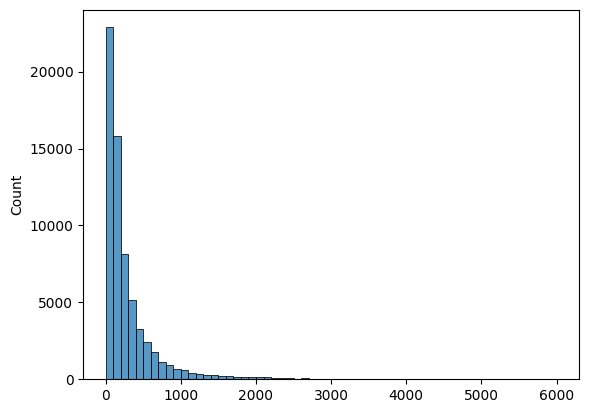

In [9]:
sns.histplot(x=np.array(descriptions), binwidth=100)